In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
sns.set(font_scale=1)

In [3]:
def calculat_f1(metrics):
    f1 = []
    for p, r in zip(metrics.Maps_at_k, metrics.Mars_at_k):
        if p != 0 and r != 0:
            f1.append(2 / (1/p + 1/r))
        else:
            f1.append(0)
    return f1

metrics = pd.read_csv("stats.csv", index_col=False)
metrics["f1"] = calculat_f1(metrics)

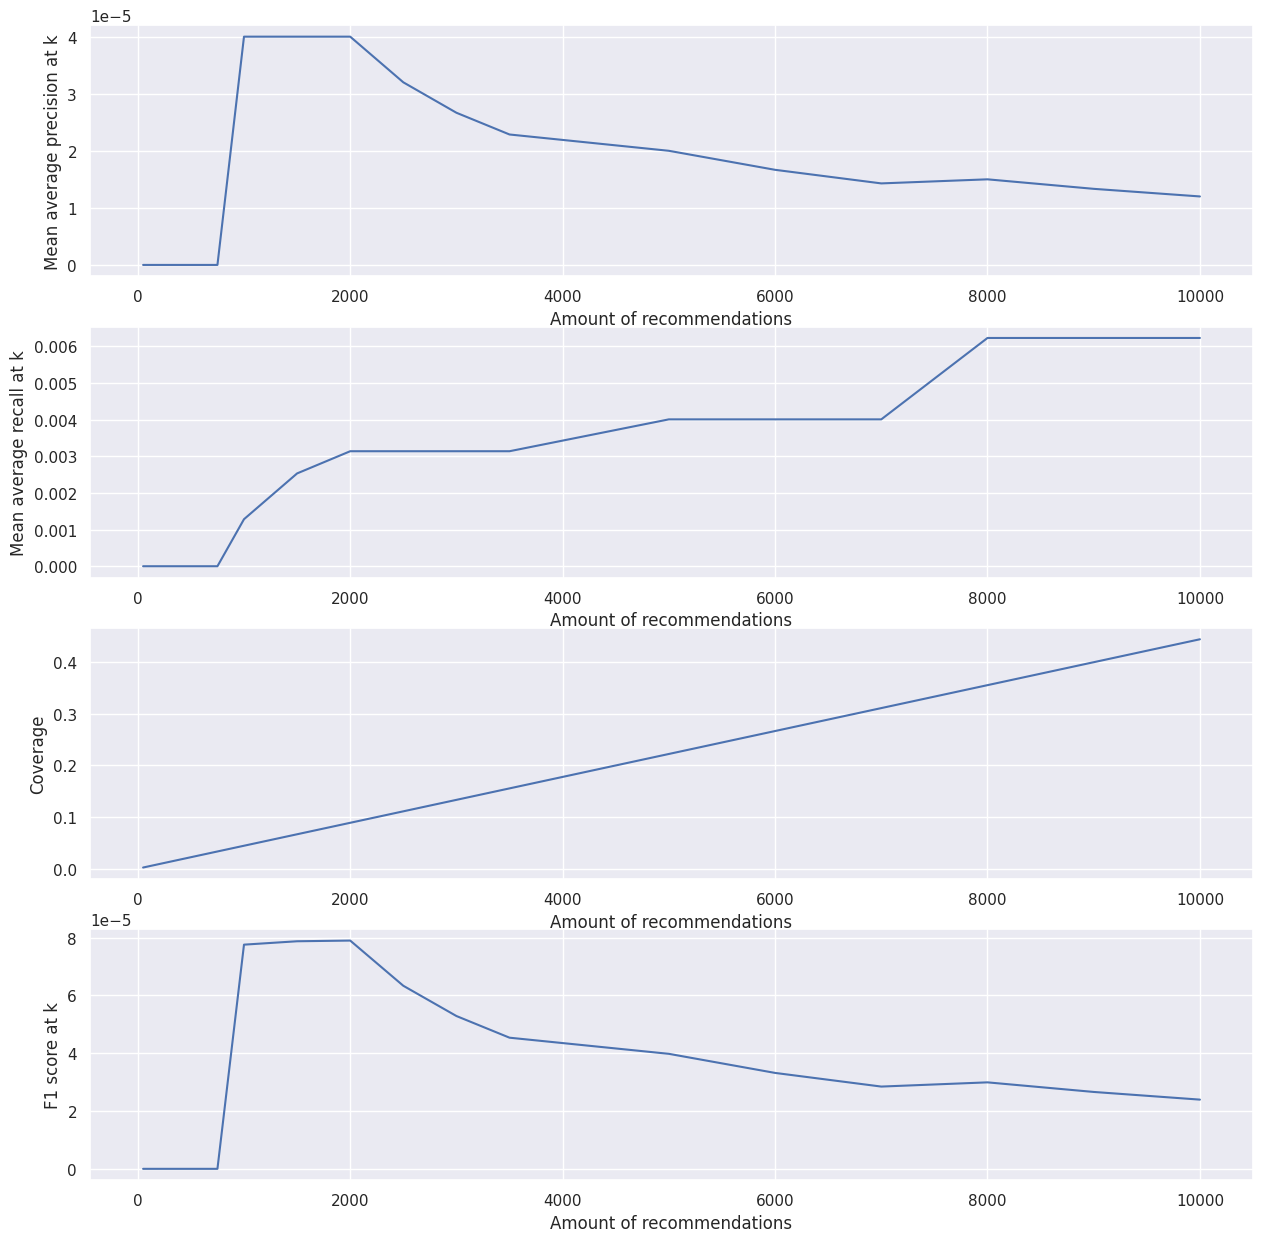

In [4]:

columns = ["Maps_at_k", "Mars_at_k", "Coverages", "f1"]
columns_names = ["Mean average precision at k", "Mean average recall at k", "Coverage", "F1 score at k"]
# histplot
fig, axes = plt.subplots(4, figsize=(15, 15))
for index, column_name in enumerate(columns):
    sns.lineplot(ax=axes[index], x="N_tracks", y=column_name, data=metrics).set(xlabel="Amount of recommendations", ylabel=columns_names[index])
plt.show()

In [5]:
fig.savefig('generate_candidates.eps', format='eps')

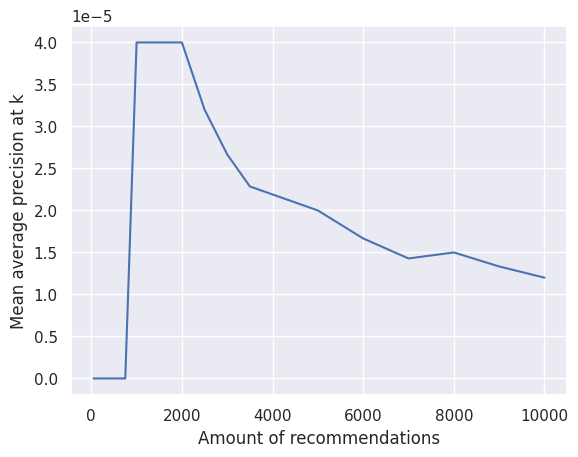

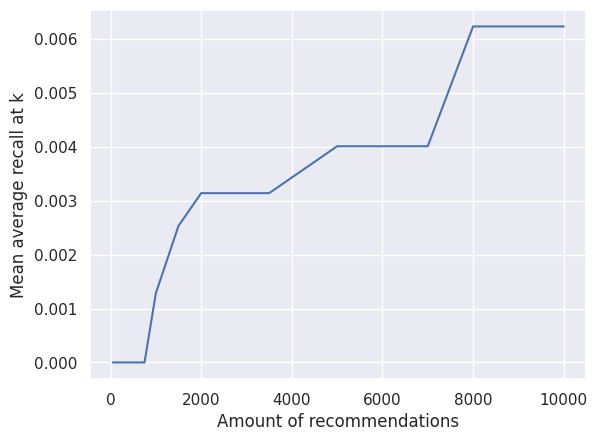

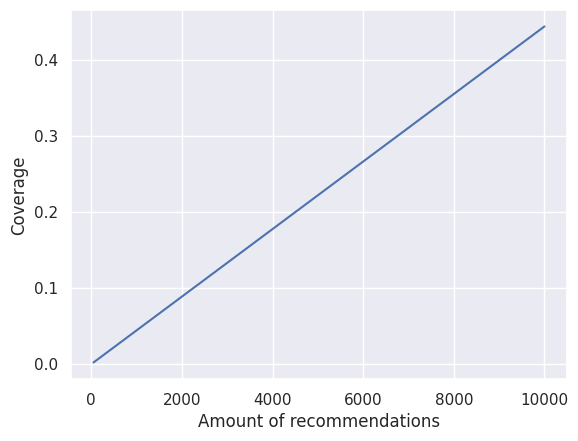

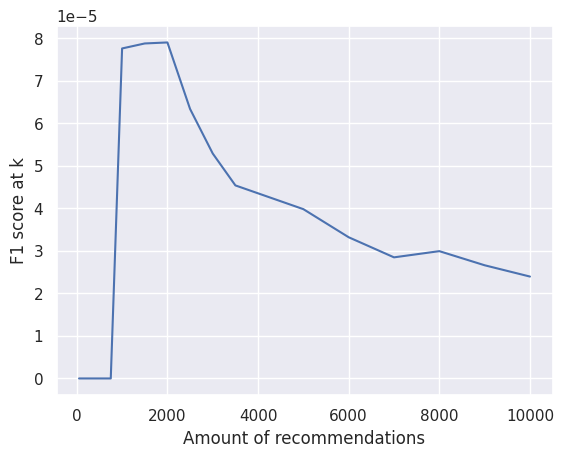

In [18]:

columns = ["Maps_at_k", "Mars_at_k", "Coverages", "f1"]
columns_names = ["Mean average precision at k", "Mean average recall at k", "Coverage", "F1 score at k"]
for col, name in zip(columns, columns_names):
    fig, ax = plt.subplots()
    plt.plot(metrics['N_tracks'], metrics[col], axes=ax)
    ax.set_xlabel("Amount of recommendations")
    ax.set_ylabel(name)
    plt.savefig(f'{name}.eps', format='eps')


# print(metrics.columns)
# fig, ax = plt.subplots()
# plt.plot(metrics['N_tracks'], metrics['Maps_at_k'], axes=ax)
# ax.set_xlabel('')
# ax.set_ylabel('Mean precision at k')
# plt.savefig()